<a href="https://colab.research.google.com/github/koushikac/Data_science-Assignments/blob/main/Salary_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
df.shape

(52, 6)

In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.drop_duplicates().sum()

Sex            14
Rank          106
Year          389
Degree         34
YSdeg         838
Salary    1237478
dtype: int64

In [6]:
df.shape

(52, 6)

In [7]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [8]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [9]:
df.Sex.quantile(0.50)

0.0

In [10]:
iqr=df.Sex.quantile(0.75)- df.Sex.quantile(0.25)
upper_threshold=df.Sex.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Sex.quantile(0.25)-(1.5*iqr)
upper_threshold

2.5

**EDA**

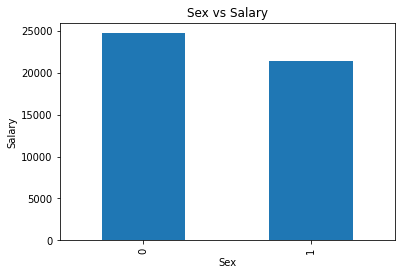

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [11]:
import matplotlib.pyplot as plt
df.groupby('Sex')['Salary'].mean().plot.bar()
plt.title('Sex vs Salary')
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()
df[['Sex','Salary']].corr()

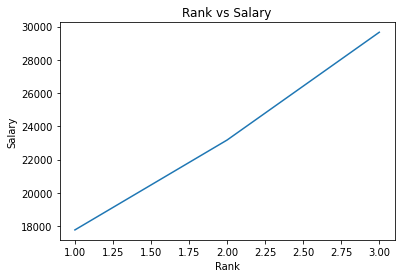

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [12]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

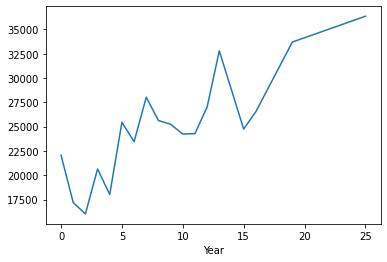

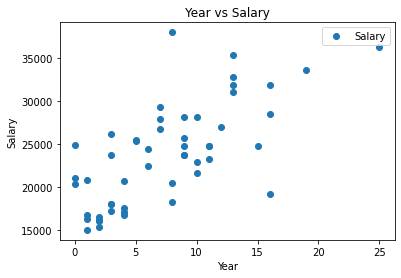

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [14]:
df.groupby('Year')['Salary'].mean()
import numpy as np
df.groupby("Year")['Salary'].mean().plot()
df["transform"]=np.power(df["Year"],3)
df.plot(x='Year',y="Salary",style="o")
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

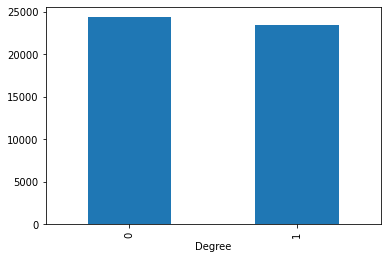

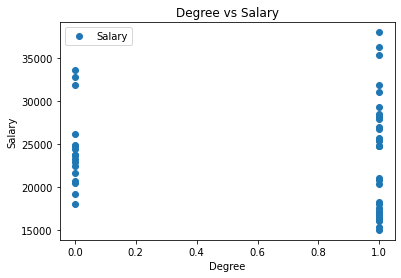

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean().plot.bar()
import matplotlib.pyplot as plt
df.plot(x='Degree',y="Salary",style="o")
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

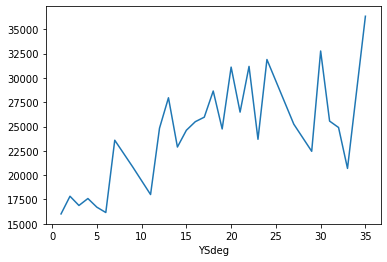

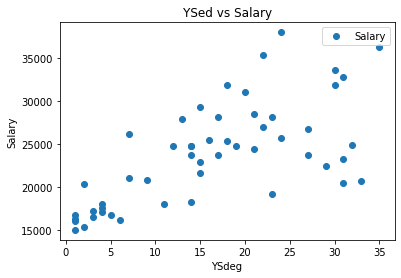

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.groupby('YSdeg')['Salary'].mean().plot()
import numpy as np
df["transform"]=np.log(df["YSdeg"])
import matplotlib.pyplot as plt
df.plot(x='YSdeg',y="Salary",style="o")
plt.title('YSed vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

In [ ]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values #array of features
y = df['Salary'].values

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test =train_test_split(X,y,test_size=0.2,random_state=0)

**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)

**Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,[['Sex', 'Rank', 'Year','Degree','YSdeg']], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [ ]:
regressor.intercept_

23655.90243902439

In [ ]:
regressor.coef_

array([ 477.50595147, 4663.42590492, 2426.26962626,  125.36091402,
       -496.03305395])

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,y_pred))

R2- SCORE: 0.6623158614875558
